In [39]:
# Armando Arturo Custodio Díaz
# 20196355
# a.custodio@pucp.edu.pe

# Importando librerias

# NUEVAS - GPT
import os

# CLASE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.fft import fft, ifft

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [2]:
# Conectando google drive con google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Integración de Datos

In [3]:
# Cargar la data SPI
path = '/content/drive/MyDrive/TemasH/EX1/data/'

# Specify the desired CSV files
desired_files_SPI = ['SPI_training_0.csv.zip', 'SPI_training_1.csv.zip', 'SPI_training_2.csv.zip', 'SPI_training_3.csv.zip']

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each specified CSV file, read it, add the "case" column, and append it to the list
for csv_file in desired_files_SPI:
    file_path_SPI = os.path.join(path, csv_file)
    df = pd.read_csv(file_path_SPI)

    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
concatenated_SPI = pd.concat(dfs, ignore_index=True)

<ipython-input-3-1029f920607b>:13: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_SPI)


In [4]:
# Specify the desired CSV file
desired_file_AOI = 'AOI_training.csv.zip'

# Construct the file path
file_path_AOI = os.path.join(path, desired_file_AOI)

# Read the specified CSV file
concatenated_AOI = pd.read_csv(file_path_AOI)

In [5]:
#display(concatenated_SPI)

In [6]:
#display(concatenated_AOI)

#Exploratory Data Analysis

Limpieza de Datos

In [7]:
# VOLUME
# AREA

# En este caso, escojo usar la regla de 99.7%, pues al usar la regla del 95%, se forman picos en los DensityPlot

def sigma_rule(df):

    rule = (100-95)/2

    data = concatenated_SPI[df].copy()

    # Calculating bounds for 2-sigma rule (approximately 2.5th and 97.5th percentiles)
    lower_bound = np.percentile(data, rule)
    upper_bound = np.percentile(data, 100-rule)

    # Identifying outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Replacing outliers with NaN values
    concatenated_SPI.loc[outliers.index, df] = np.nan

sigma_rule('Volume(%)')
sigma_rule('Area(%)')
sigma_rule('Height(um)')
sigma_rule('OffsetX(%)')
sigma_rule('OffsetY(%)')
sigma_rule('SizeX')
sigma_rule('SizeY')

Verificar la existencia de valores faltantes y manejarlos adecuadamente.

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(concatenated_SPI)

Your selected dataframe has 21 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Volume(%),299245,5.0
Height(um),299221,5.0
Area(%),299215,5.0
SizeX,123144,2.1
SizeY,123096,2.1
FigureID,1,0.0
Date,1,0.0
Time,1,0.0
OffsetX(%),1,0.0
OffsetY(%),1,0.0


In [10]:
missing_values_table(concatenated_AOI)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
RepairLabel,30261,95.7
PinNumber,9124,28.9


In [11]:
# Reemplazando valores numéricos nulos con la media
concatenated_SPI['Volume(%)']=concatenated_SPI['Volume(%)'].fillna(concatenated_SPI['Volume(%)'].mean())
concatenated_SPI['Area(%)']=concatenated_SPI['Area(%)'].fillna(concatenated_SPI['Area(%)'].mean())
concatenated_SPI['Height(um)']=concatenated_SPI['Height(um)'].fillna(concatenated_SPI['Height(um)'].mean())
concatenated_SPI['OffsetX(%)']=concatenated_SPI['OffsetX(%)'].fillna(concatenated_SPI['OffsetX(%)'].mean())
concatenated_SPI['OffsetY(%)']=concatenated_SPI['OffsetY(%)'].fillna(concatenated_SPI['OffsetY(%)'].mean())
concatenated_SPI['SizeX']=concatenated_SPI['SizeX'].fillna(concatenated_SPI['SizeX'].mean())
concatenated_SPI['SizeY']=concatenated_SPI['SizeY'].fillna(concatenated_SPI['SizeY'].mean())

# Eliminando valores nulos de AOI
concatenated_AOI = concatenated_AOI.dropna(subset=['RepairLabel'])

In [12]:
missing_values_table(concatenated_SPI)

Your selected dataframe has 21 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
FigureID,1,0.0
Date,1,0.0
Time,1,0.0
PosX(mm),1,0.0
PosY(mm),1,0.0


In [13]:
missing_values_table(concatenated_AOI)

Your selected dataframe has 8 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
PinNumber,451,33.3


In [14]:
display(concatenated_SPI)

,PanelID,FigureID,Date,Time,ComponentID,PinNumber,PadID,PadType,Volume(%),Height(um),...,OffsetX(%),OffsetY(%),SizeX,SizeY,Volume(um3),Area(um2),Shape(um),PosX(mm),PosY(mm),Result
0,25319088000520102844,1.0,9/11/2019,00:07:04,BC1,1,1.0,0.0,89.873,129.801000,...,0.423,0.829,0.782919,0.681233,3.506371e+09,27013470.0,0.0,55.6,23.6,GOOD
1,25319088000520102844,1.0,9/11/2019,00:07:04,BC1,2,2.0,0.0,86.353,124.976000,...,0.317,0.791,0.782919,0.681233,3.369075e+09,26957750.0,0.0,48.5,23.6,GOOD
2,25319088000520102844,1.0,9/11/2019,00:07:04,BC2,1,3.0,0.0,94.614,112.341487,...,-0.060,1.079,0.782919,0.681233,3.691364e+09,27189650.0,0.0,13.4,23.6,GOOD
3,25319088000520102844,1.0,9/11/2019,00:07:04,BC2,2,4.0,0.0,93.434,112.341487,...,0.116,0.768,0.782919,0.681233,3.645320e+09,27252060.0,0.0,20.5,23.6,GOOD
4,25319088000520102844,1.0,9/11/2019,00:07:04,BC3,1,5.0,0.0,88.119,127.896000,...,-0.234,0.598,0.782919,0.681233,3.437968e+09,26881040.0,0.0,55.6,45.6,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985377,27219034900520102844,8.0,7/29/2019,23:26:35,U5,6,3156.0,0.0,103.307,116.562000,...,-0.354,4.940,1.880000,0.580000,1.351708e+08,1159644.0,44.4,43.5,87.9,GOOD
5985378,27219034900520102844,8.0,7/29/2019,23:26:35,U5,7,3157.0,0.0,96.417,110.576000,...,0.052,4.102,1.880000,0.580000,1.261555e+08,1140890.0,46.7,43.5,86.6,GOOD
5985379,27219034900520102844,8.0,7/29/2019,23:26:35,U5,8,3158.0,0.0,98.385,112.209000,...,0.971,4.691,1.880000,0.580000,1.287307e+08,1147242.0,44.4,43.5,85.4,GOOD
5985380,27219034900520102844,8.0,7/29/2019,23:26:35,Z1,1,3159.0,0.0,84.272,109.335000,...,1.985,6.301,0.770000,0.470000,3.656671e+07,334447.0,42.6,43.1,82.4,GOOD


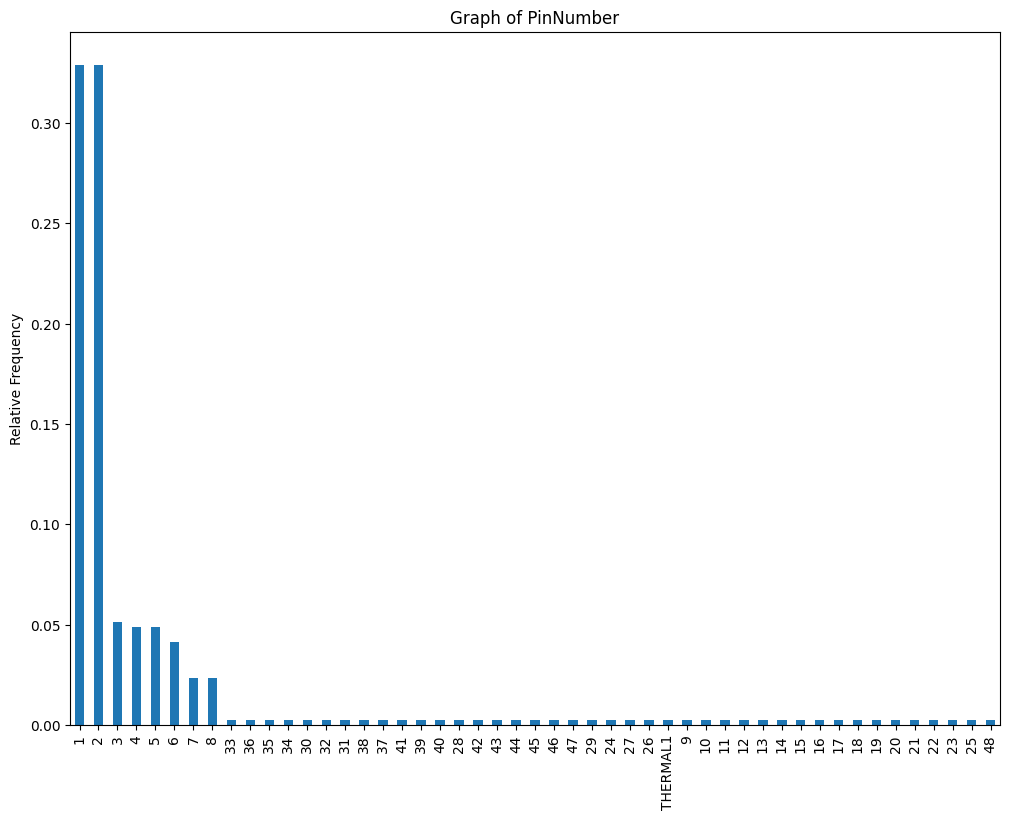

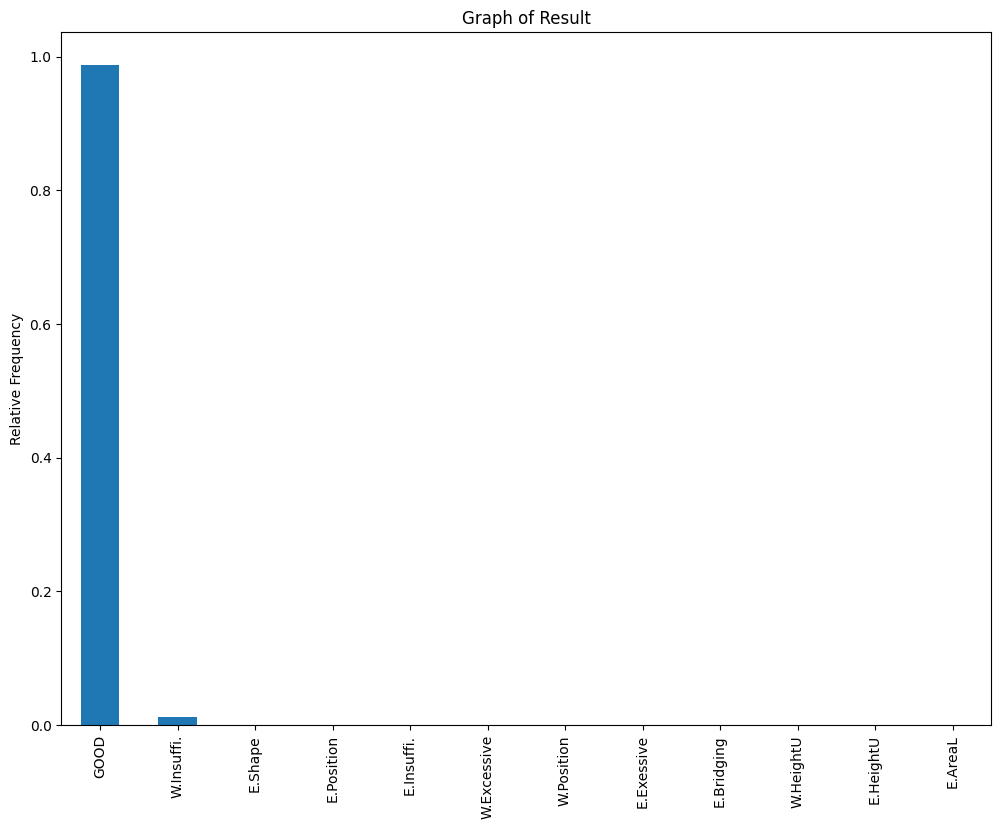

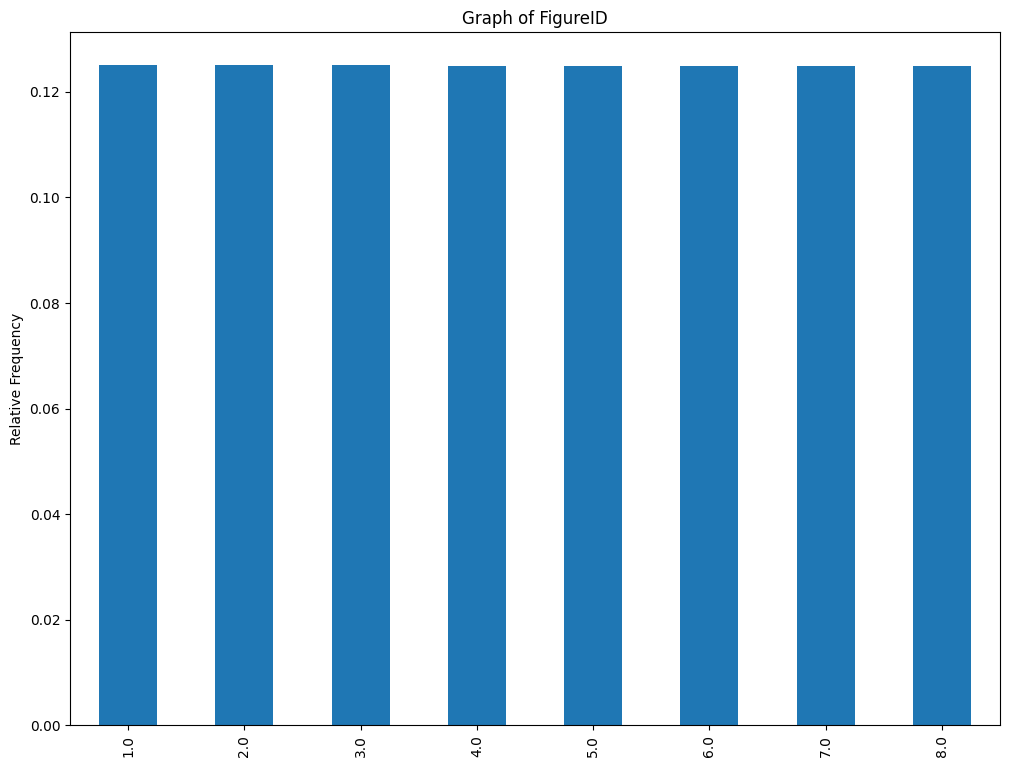

In [15]:
# Calculate relative frequencies

def relative_plot(df):
  relative_freq = concatenated_SPI[df].value_counts(normalize=True)

  # Plot
  plt.figure(figsize=(12, 9))
  relative_freq.plot(kind='bar')
  plt.ylabel('Relative Frequency')
  plt.title('Graph of ' + df)
  plt.xticks(rotation=90)

  plt.show()

relative_plot('PinNumber')
relative_plot('Result')
relative_plot('FigureID')

#Ingeniería de características (feature engineering):

In [16]:
aggs_SPI = {}
aggs_SPI['Volume(%)']=['mean','std','min','max','median']
aggs_SPI['Height(um)']=['mean','std','min','max','median']
aggs_SPI['Area(%)']=['mean','std','min','max','median']
aggs_SPI['OffsetX(%)']=['mean','std','min','max','median']
aggs_SPI['OffsetY(%)']=['mean','std','min','max','median']
aggs_SPI['SizeX']=['mean','std','min','max','median']
aggs_SPI['SizeY']=['mean','std','min','max','median']

Data_SPI_agg = concatenated_SPI.groupby(['PanelID', 'FigureID', 'ComponentID']).agg(aggs_SPI)
Data_SPI_agg.columns = Data_SPI_agg.columns.map('_'.join)
Data_SPI_agg =Data_SPI_agg.reset_index()

display(Data_SPI_agg)

,PanelID,FigureID,ComponentID,Volume(%)_mean,Volume(%)_std,Volume(%)_min,Volume(%)_max,Volume(%)_median,Height(um)_mean,Height(um)_std,...,SizeX_mean,SizeX_std,SizeX_min,SizeX_max,SizeX_median,SizeY_mean,SizeY_std,SizeY_min,SizeY_max,SizeY_median
0,25319088000520102844,1.0,BC1,88.113000,2.489016,86.353000,89.873000,88.113000,127.388500,3.411790,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
1,25319088000520102844,1.0,BC2,94.024000,0.834386,93.434000,94.614000,94.024000,112.341487,0.000000,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
2,25319088000520102844,1.0,BC3,83.982500,5.849894,79.846000,88.119000,83.982500,121.269000,9.371993,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
3,25319088000520102844,1.0,BC4,95.677000,7.119151,90.643000,100.711000,95.677000,120.653743,11.755306,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
4,25319088000520102844,1.0,C1,92.440274,0.000000,92.440274,92.440274,92.440274,112.341487,0.000000,...,1.380000,0.000000,1.380000,1.380000,1.380000,0.960000,0.000000,0.960000,0.960000,0.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969518,27219034900520102844,8.0,U2,82.490400,7.759883,71.467000,90.533000,80.642000,117.948497,9.126551,...,0.279000,0.000000,0.279000,0.279000,0.279000,0.889000,0.000000,0.889000,0.889000,0.889000
1969519,27219034900520102844,8.0,U3,96.339566,7.721921,82.692000,113.843000,92.440274,118.001979,5.485438,...,0.642041,0.425505,0.220000,1.070000,0.500000,0.642041,0.425505,0.220000,1.070000,0.500000
1969520,27219034900520102844,8.0,U4,98.901000,5.109562,89.972000,102.427000,100.205000,125.390800,4.558422,...,0.450000,0.000000,0.450000,0.450000,0.450000,1.143000,0.000000,1.143000,1.143000,1.143000
1969521,27219034900520102844,8.0,U5,102.470375,4.662885,96.417000,110.886000,102.705500,116.891000,4.549296,...,1.880000,0.000000,1.880000,1.880000,1.880000,0.580000,0.000000,0.580000,0.580000,0.580000


In [17]:
aggs_AOI = {}
aggs_AOI['RepairLabel']=['first']

Data_AOI_agg = concatenated_AOI.groupby(['PanelID', 'FigureID', 'ComponentID']).agg(aggs_AOI)
Data_AOI_agg.columns = Data_AOI_agg.columns.map('_'.join)
Data_AOI_agg =Data_AOI_agg.reset_index()

display(Data_AOI_agg)

,PanelID,FigureID,ComponentID,RepairLabel_first
0,25319088000520102844,3,TRB3,FalseScrap
1,25319088000520102844,6,U3,FalseScrap
2,26319048400520102844,6,BC4,NotPossibleToRepair
3,26319049200520102844,3,C21,NotPossibleToRepair
4,26319054900520102844,8,RA1,FalseScrap
...,...,...,...,...
407,27219031000520102844,8,C25,FalseScrap
408,27219031300520102844,7,U3,FalseScrap
409,27219032200520102844,3,BC4,NotPossibleToRepair
410,27219033200520102844,1,R27,FalseScrap


#Integración de Datos

In [18]:
Data_AOI_SPI_agg = Data_AOI_agg.merge(Data_SPI_agg,on=['PanelID', 'FigureID', 'ComponentID'],how='left')
display(Data_AOI_SPI_agg)

,PanelID,FigureID,ComponentID,RepairLabel_first,Volume(%)_mean,Volume(%)_std,Volume(%)_min,Volume(%)_max,Volume(%)_median,Height(um)_mean,...,SizeX_mean,SizeX_std,SizeX_min,SizeX_max,SizeX_median,SizeY_mean,SizeY_std,SizeY_min,SizeY_max,SizeY_median
0,25319088000520102844,3,TRB3,FalseScrap,99.448349,10.857163,92.440274,113.592000,92.440274,115.247739,...,0.889000,0.000000,0.889000,0.889000,0.889000,0.279000,0.000000,0.279000,0.279000,0.279000
1,25319088000520102844,6,U3,FalseScrap,92.440274,0.000000,92.440274,92.440274,92.440274,118.984288,...,0.642041,0.425505,0.220000,1.070000,0.500000,0.642041,0.425505,0.220000,1.070000,0.500000
2,26319048400520102844,6,BC4,NotPossibleToRepair,73.524000,2.730846,71.593000,75.455000,73.524000,110.161500,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
3,26319049200520102844,3,C21,NotPossibleToRepair,81.593000,3.442196,79.159000,84.027000,81.593000,97.393000,...,0.800000,0.000000,0.800000,0.800000,0.800000,0.900000,0.000000,0.900000,0.900000,0.900000
4,26319054900520102844,8,RA1,FalseScrap,105.478750,4.661991,96.649000,111.497000,105.598000,122.712750,...,0.292000,0.040624,0.254000,0.330000,0.292000,0.737000,0.000000,0.737000,0.737000,0.737000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,27219031000520102844,8,C25,FalseScrap,97.445500,4.169809,94.497000,100.394000,97.445500,115.776000,...,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000
408,27219031300520102844,7,U3,FalseScrap,99.072366,8.749625,92.440274,116.053000,92.440274,122.102467,...,0.642041,0.425505,0.220000,1.070000,0.500000,0.642041,0.425505,0.220000,1.070000,0.500000
409,27219032200520102844,3,BC4,NotPossibleToRepair,92.440274,0.000000,92.440274,92.440274,92.440274,104.015743,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
410,27219033200520102844,1,R27,FalseScrap,97.909000,5.096826,94.305000,101.513000,97.909000,121.321500,...,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000


Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [19]:
# Eliminar filas con valores nulos en la columna 'RepairLabel'
Data_AOI_SPI_agg = Data_AOI_SPI_agg.dropna(subset=['RepairLabel_first'])

# Filtrar las filas donde 'RepairLabel' no es igual a 'NotYetClassified'
Data_AOI_SPI_agg = Data_AOI_SPI_agg[Data_AOI_SPI_agg['RepairLabel_first'] != 'NotYetClassified']

display(Data_AOI_SPI_agg)

,PanelID,FigureID,ComponentID,RepairLabel_first,Volume(%)_mean,Volume(%)_std,Volume(%)_min,Volume(%)_max,Volume(%)_median,Height(um)_mean,...,SizeX_mean,SizeX_std,SizeX_min,SizeX_max,SizeX_median,SizeY_mean,SizeY_std,SizeY_min,SizeY_max,SizeY_median
0,25319088000520102844,3,TRB3,FalseScrap,99.448349,10.857163,92.440274,113.592000,92.440274,115.247739,...,0.889000,0.000000,0.889000,0.889000,0.889000,0.279000,0.000000,0.279000,0.279000,0.279000
1,25319088000520102844,6,U3,FalseScrap,92.440274,0.000000,92.440274,92.440274,92.440274,118.984288,...,0.642041,0.425505,0.220000,1.070000,0.500000,0.642041,0.425505,0.220000,1.070000,0.500000
2,26319048400520102844,6,BC4,NotPossibleToRepair,73.524000,2.730846,71.593000,75.455000,73.524000,110.161500,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
3,26319049200520102844,3,C21,NotPossibleToRepair,81.593000,3.442196,79.159000,84.027000,81.593000,97.393000,...,0.800000,0.000000,0.800000,0.800000,0.800000,0.900000,0.000000,0.900000,0.900000,0.900000
4,26319054900520102844,8,RA1,FalseScrap,105.478750,4.661991,96.649000,111.497000,105.598000,122.712750,...,0.292000,0.040624,0.254000,0.330000,0.292000,0.737000,0.000000,0.737000,0.737000,0.737000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,27219031000520102844,8,C25,FalseScrap,97.445500,4.169809,94.497000,100.394000,97.445500,115.776000,...,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000
408,27219031300520102844,7,U3,FalseScrap,99.072366,8.749625,92.440274,116.053000,92.440274,122.102467,...,0.642041,0.425505,0.220000,1.070000,0.500000,0.642041,0.425505,0.220000,1.070000,0.500000
409,27219032200520102844,3,BC4,NotPossibleToRepair,92.440274,0.000000,92.440274,92.440274,92.440274,104.015743,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
410,27219033200520102844,1,R27,FalseScrap,97.909000,5.096826,94.305000,101.513000,97.909000,121.321500,...,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000


#Definición de variables independientes y dependientes

Seleccionar las variables independientes (X)

In [29]:
X = Data_AOI_SPI_agg.drop(['PanelID', 'FigureID', 'ComponentID', 'RepairLabel_first'], axis=1)

Y_temp = Data_AOI_SPI_agg.copy()
#Adapto la data en Y para poderlo usar en el modelo predictivo
Y_temp['RepairLabel_first'] = Y_temp['RepairLabel_first'].map({'FalseScrap':0,'NotPossibleToRepair':1})

Y = Y_temp['RepairLabel_first'].copy()

display(X)
display(Y)

,Volume(%)_mean,Volume(%)_std,Volume(%)_min,Volume(%)_max,Volume(%)_median,Height(um)_mean,Height(um)_std,Height(um)_min,Height(um)_max,Height(um)_median,...,SizeX_mean,SizeX_std,SizeX_min,SizeX_max,SizeX_median,SizeY_mean,SizeY_std,SizeY_min,SizeY_max,SizeY_median
0,99.448349,10.857163,92.440274,113.592000,92.440274,115.247739,7.118835,112.341487,129.779000,112.341487,...,0.889000,0.000000,0.889000,0.889000,0.889000,0.279000,0.000000,0.279000,0.279000,0.279000
1,92.440274,0.000000,92.440274,92.440274,92.440274,118.984288,8.149459,112.341487,130.924000,112.341487,...,0.642041,0.425505,0.220000,1.070000,0.500000,0.642041,0.425505,0.220000,1.070000,0.500000
2,73.524000,2.730846,71.593000,75.455000,73.524000,110.161500,3.896865,107.406000,112.917000,110.161500,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
3,81.593000,3.442196,79.159000,84.027000,81.593000,97.393000,3.756151,94.737000,100.049000,97.393000,...,0.800000,0.000000,0.800000,0.800000,0.800000,0.900000,0.000000,0.900000,0.900000,0.900000
4,105.478750,4.661991,96.649000,111.497000,105.598000,122.712750,2.973590,116.805000,126.254000,123.177500,...,0.292000,0.040624,0.254000,0.330000,0.292000,0.737000,0.000000,0.737000,0.737000,0.737000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,97.445500,4.169809,94.497000,100.394000,97.445500,115.776000,3.842418,113.059000,118.493000,115.776000,...,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000
408,99.072366,8.749625,92.440274,116.053000,92.440274,122.102467,5.813619,109.892000,131.200000,123.397000,...,0.642041,0.425505,0.220000,1.070000,0.500000,0.642041,0.425505,0.220000,1.070000,0.500000
409,92.440274,0.000000,92.440274,92.440274,92.440274,104.015743,11.774379,95.690000,112.341487,104.015743,...,0.782919,0.000000,0.782919,0.782919,0.782919,0.681233,0.000000,0.681233,0.681233,0.681233
410,97.909000,5.096826,94.305000,101.513000,97.909000,121.321500,3.946363,118.531000,124.112000,121.321500,...,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000


0      0
1      0
2      1
3      1
4      0
      ..
407    0
408    0
409    1
410    0
411    1
Name: RepairLabel_first, Length: 347, dtype: int64

In [31]:
# División adecuada de los datos para entrenamiento y validación del modelo. (70% entrenamiento - 30% validación)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=69)

In [32]:
import xgboost as xgb
from xgboost import plot_importance

model = xgb.XGBClassifier(n_estimators=1000)
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#Realización de predicciones

In [34]:
Y_test_pred = model.predict(X_test)

In [35]:
f1_score(Y_test,Y_test_pred)

0.8201438848920863

In [36]:
accuracy_score(Y_test,Y_test_pred)

0.7619047619047619

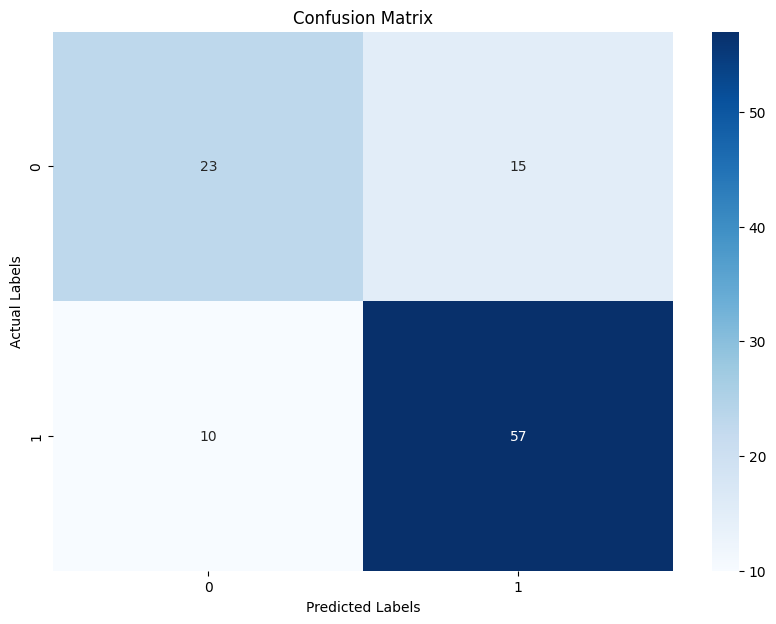

In [41]:
#Confusion Matrix

conf_matrix = confusion_matrix(Y_test,Y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

#Feature Importance

In [42]:
# Usar Gain como métrica
importance = model.get_booster().get_score(importance_type='gain')

# Convertir el diccionario a Dataframe
importance_df = pd.DataFrame(importance.items(),columns = ['Feature', 'Importance'])

# Ordenar por importancia, jerarquía de importancia
importance_df = importance_df.sort_values(by='Importance',ascending=False).reset_index(drop=True)

In [43]:
importance_df.head(10)

,Feature,Importance
0,SizeY_max,1.612602
1,OffsetY(%)_max,1.510922
2,Volume(%)_median,1.241456
3,OffsetY(%)_min,1.094993
4,Height(um)_min,0.757585
5,OffsetX(%)_mean,0.667135
6,Volume(%)_max,0.448256
7,Height(um)_mean,0.417625
8,SizeX_mean,0.415046
9,OffsetX(%)_std,0.408697


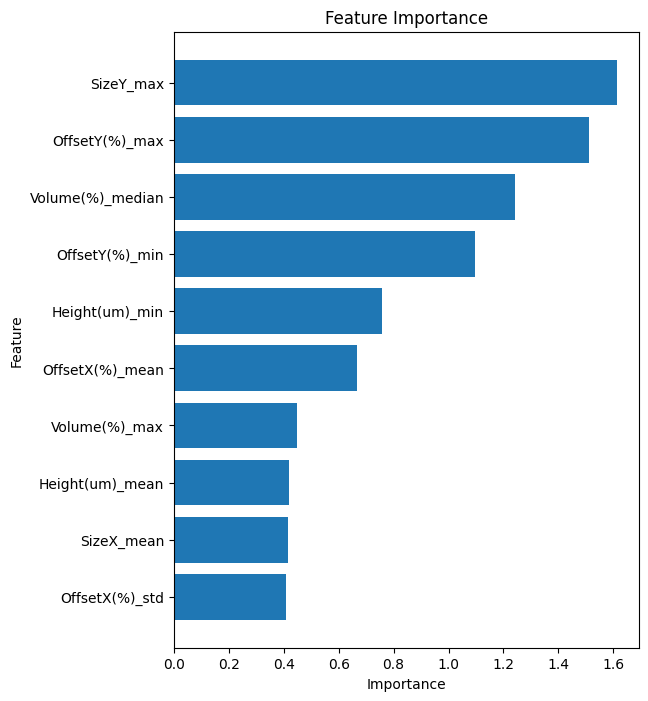

In [47]:
plt.figure(figsize=(6,8))
plt.barh(importance_df['Feature'][0:10],importance_df['Importance'][0:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.gca().invert_yaxis() # Highest importance at the top
plt.show()